<a href="https://colab.research.google.com/github/bidallei/MIAAD-UACJ/blob/main/Practica20_263150.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##**Práctica 20: Ejercicios con EDA 1s**
---

Alumno: Álvaro Hernandez Jarquín<br>
Seminario: Programación para analítica descriptiva y predictiva
---

Descripción del conjunto de datos:

* Utiliza el conjunto de datos "Air Quality".
* Este conjunto contiene datos horarios de sensores de calidad del aire, incluyendo niveles de CO, NOx, y otros contaminantes.
* El conjunto de datos tiene valores faltantes y columnas categóricas (por ejemplo, el día de la semana).

**Instrucciones para los estudiantes:**

1. Descargar el archivo AirQuality.csv desde el enlace proporcionado.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 1. Descargar el archivo AirQuality.csv desde el enlace proporcionado.
airqt = pd.read_csv('/content/drive/MyDrive/ClassFiles/AirQuality.csv', sep=';', decimal=',')

print(airqt.head())
print("="*100)
print(airqt.info())

         Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  10/03/2004  18.00.00     2.6       1360.0     150.0      11.9   
1  10/03/2004  19.00.00     2.0       1292.0     112.0       9.4   
2  10/03/2004  20.00.00     2.2       1402.0      88.0       9.0   
3  10/03/2004  21.00.00     2.2       1376.0      80.0       9.2   
4  10/03/2004  22.00.00     1.6       1272.0      51.0       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0        1490.0       1110.0   

      T    RH      AH  Unnamed: 15  Unnamed: 16  
0  13.6  48.9  0.7578          NaN          NaN  
1  13.3  47.7  0

2. Realizar un EDA completo, incluyendo:

* Descripción de los datos (medias, medianas, desviaciones estándar, etc.).


In [ ]:
# Haremos un nuevo dataframe sin las columnas que tienen datos nulos
airqt2 = airqt.drop(columns=['Unnamed: 15', 'Unnamed: 16'])

# Convertimos las columnas 'Date' y 'Time' a tipo string para poder concatenarlas
airqt2['Date'] = airqt2['Date'].astype(str)
airqt2['Time'] = airqt2['Time'].astype(str).str.replace('.', ':', regex=False)

# Combinamos ambas columnas y las convertimos a datetime
airqt2['Date/Time'] = pd.to_datetime(
    airqt2['Date'] + ' ' + airqt2['Time'],
    format='%d/%m/%Y %H:%M:%S',
    errors='coerce'
)

# Eliminamos las columnas originales 'Date' y 'Time'
airqt2.drop(columns=['Date', 'Time'], inplace=True)
print(airqt2.info())
print(airqt2.head(2))
print("="*100)

# Seleccionamos solo las columnas numéricas
columnas_numericas = airqt2.select_dtypes(include=[np.number]).columns

# Descripción de los datos (medias, medianas, desviaciones estándar, etc.).
print(airqt2[columnas_numericas].describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CO(GT)         9357 non-null   float64       
 1   PT08.S1(CO)    9357 non-null   float64       
 2   NMHC(GT)       9357 non-null   float64       
 3   C6H6(GT)       9357 non-null   float64       
 4   PT08.S2(NMHC)  9357 non-null   float64       
 5   NOx(GT)        9357 non-null   float64       
 6   PT08.S3(NOx)   9357 non-null   float64       
 7   NO2(GT)        9357 non-null   float64       
 8   PT08.S4(NO2)   9357 non-null   float64       
 9   PT08.S5(O3)    9357 non-null   float64       
 10  T              9357 non-null   float64       
 11  RH             9357 non-null   float64       
 12  AH             9357 non-null   float64       
 13  Date/Time      9357 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(13)
memory usage: 1.0 MB
None
   CO(GT)  P


* Histogramas para las columnas numéricas.

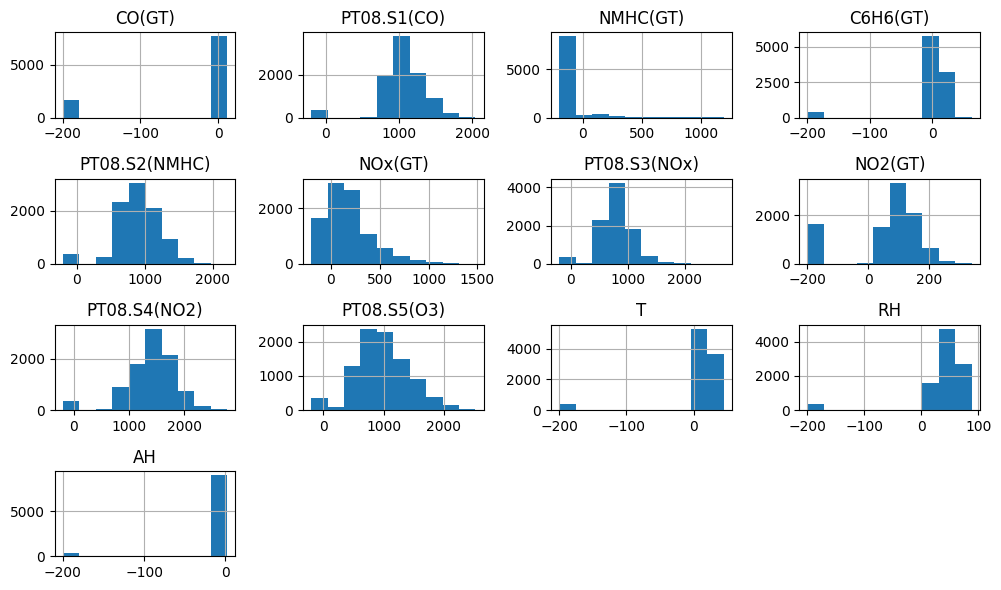

In [ ]:
# Histograma de las columnas numéricas
airqt2[columnas_numericas].hist(figsize=(10, 6))
plt.tight_layout()
plt.show()

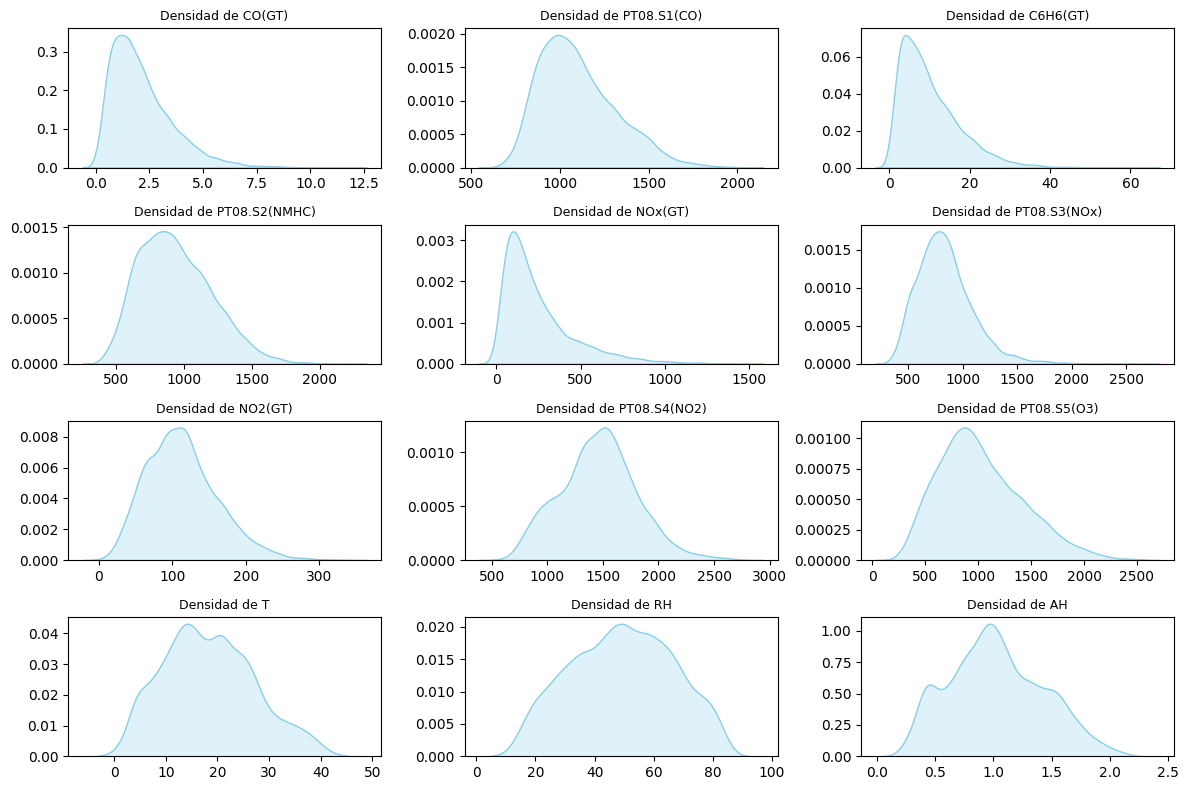

In [ ]:
# Gráfica de densidad
plt.figure(figsize=(12, 8))

for i, columna in enumerate(columnas_numericas, 1):
    plt.subplot(4, 3, i)
    sns.kdeplot(data=airqt2, x=columna, fill=True, color='skyblue')
    plt.title(f"Densidad de {columna}", fontsize=9)
    plt.xlabel("")
    plt.ylabel("")

plt.tight_layout()
plt.show()

* De la columna Time obten el día de la Semana y realiza una gráfica de barras.


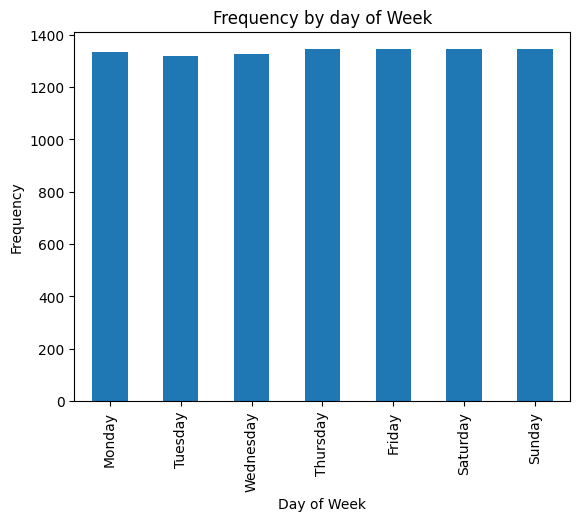

In [ ]:
# Obtenemos el día de la semana de la columna 'Date/Time'
airqt2['DayOfWeek'] = airqt2['Date/Time'].dt.day_name()

# Agrupamos por día de la semana y contamos la frecuencia
graficas_barras = airqt2.groupby('DayOfWeek').size()

# Definimos el orden de los días de la semana
dias_semana_orden = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Graficamos los datos
graficas_barras.reindex(dias_semana_orden).plot(kind='bar')
plt.xlabel('Day of Week')
plt.ylabel('Frequency')
plt.title('Frequency by day of Week')
plt.show()

* Boxplots para identificar outliers en las columnas numéricas.


In [ ]:
# Boxplots para identificar outliers en las columnas numéricas
import plotly.express as px
fig = px.box(airqt2, y=columnas_numericas)
fig.show()


Ya que existen muchos valores fuera de rango menores que 0, reemplazamos los valores anómalos de -200.0 por NaN

In [ ]:
# Reemplazamos los valores anómalos de -200.0 por NaN
airqt2.replace(to_replace=-200, value=np.nan, inplace=True)

# Observamos cómo cambiaron las tablas
print(airqt2[columnas_numericas].describe())

# Observamos cómo cambiaron los boxplots para las columnas numéricas
fig = px.box(airqt2, y=columnas_numericas)
fig.show()

            CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  7674.000000  8991.000000   914.000000  8991.000000    8991.000000   
mean      2.152750  1099.833166   218.811816    10.083105     939.153376   
std       1.453252   217.080037   204.459921     7.449820     266.831429   
min       0.100000   647.000000     7.000000     0.100000     383.000000   
25%       1.100000   937.000000    67.000000     4.400000     734.500000   
50%       1.800000  1063.000000   150.000000     8.200000     909.000000   
75%       2.900000  1231.000000   297.000000    14.000000    1116.000000   
max      11.900000  2040.000000  1189.000000    63.700000    2214.000000   

           NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  7718.000000   8991.000000  7715.000000   8991.000000  8991.000000   
mean    246.896735    835.493605   113.091251   1456.264598  1022.906128   
std     212.979168    256.817320    48.370108    346.206794   398.484288   
min       2

In [ ]:
# Contamos el número de valores NaN por columna
nan_count = airqt2.isnull().sum()
print("Número de valores NaN por columna:")
print(nan_count)
print("-" * 50)

# Calculamos el porcentaje de NaN por columna
total_rows = len(airqt2)
nan_percentage = (nan_count / total_rows) * 100
print("Porcentaje de valores NaN por columna:")
print(nan_percentage)

Número de valores NaN por columna:
CO(GT)           1797
PT08.S1(CO)       480
NMHC(GT)         8557
C6H6(GT)          480
PT08.S2(NMHC)     480
NOx(GT)          1753
PT08.S3(NOx)      480
NO2(GT)          1756
PT08.S4(NO2)      480
PT08.S5(O3)       480
T                 480
RH                480
AH                480
Date/Time         114
DayOfWeek         114
dtype: int64
--------------------------------------------------
Porcentaje de valores NaN por columna:
CO(GT)           18.973709
PT08.S1(CO)       5.068103
NMHC(GT)         90.349488
C6H6(GT)          5.068103
PT08.S2(NMHC)     5.068103
NOx(GT)          18.509133
PT08.S3(NOx)      5.068103
NO2(GT)          18.540809
PT08.S4(NO2)      5.068103
PT08.S5(O3)       5.068103
T                 5.068103
RH                5.068103
AH                5.068103
Date/Time         1.203674
DayOfWeek         1.203674
dtype: float64


In [ ]:
# Basado en el resultado de los valores nulos, eliminamos la columna NMHC(GT)
airqt3 = airqt2.drop(columns=['NMHC(GT)'], errors='ignore')
columnas_numericas = airqt3.select_dtypes(include=[np.number]).columns

* Matriz de correlación y mapa de calor.

                 CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)   NOx(GT)  \
CO(GT)         1.000000     0.879288  0.931078       0.915514  0.795028   
PT08.S1(CO)    0.879288     1.000000  0.883795       0.892964  0.713654   
C6H6(GT)       0.931078     0.883795  1.000000       0.981950  0.718839   
PT08.S2(NMHC)  0.915514     0.892964  0.981950       1.000000  0.704435   
NOx(GT)        0.795028     0.713654  0.718839       0.704435  1.000000   
PT08.S3(NOx)  -0.703446    -0.771938 -0.735744      -0.796703 -0.655707   
NO2(GT)        0.683343     0.641529  0.614474       0.646245  0.763111   
PT08.S4(NO2)   0.630703     0.682881  0.765731       0.777254  0.233731   
PT08.S5(O3)    0.854182     0.899324  0.865689       0.880578  0.787046   
T              0.022109     0.048627  0.198956       0.241373 -0.269683   
RH             0.048890     0.114606 -0.061681      -0.090380  0.221032   
AH             0.048556     0.135324  0.167972       0.186933 -0.149323   

               PT08.S3(N

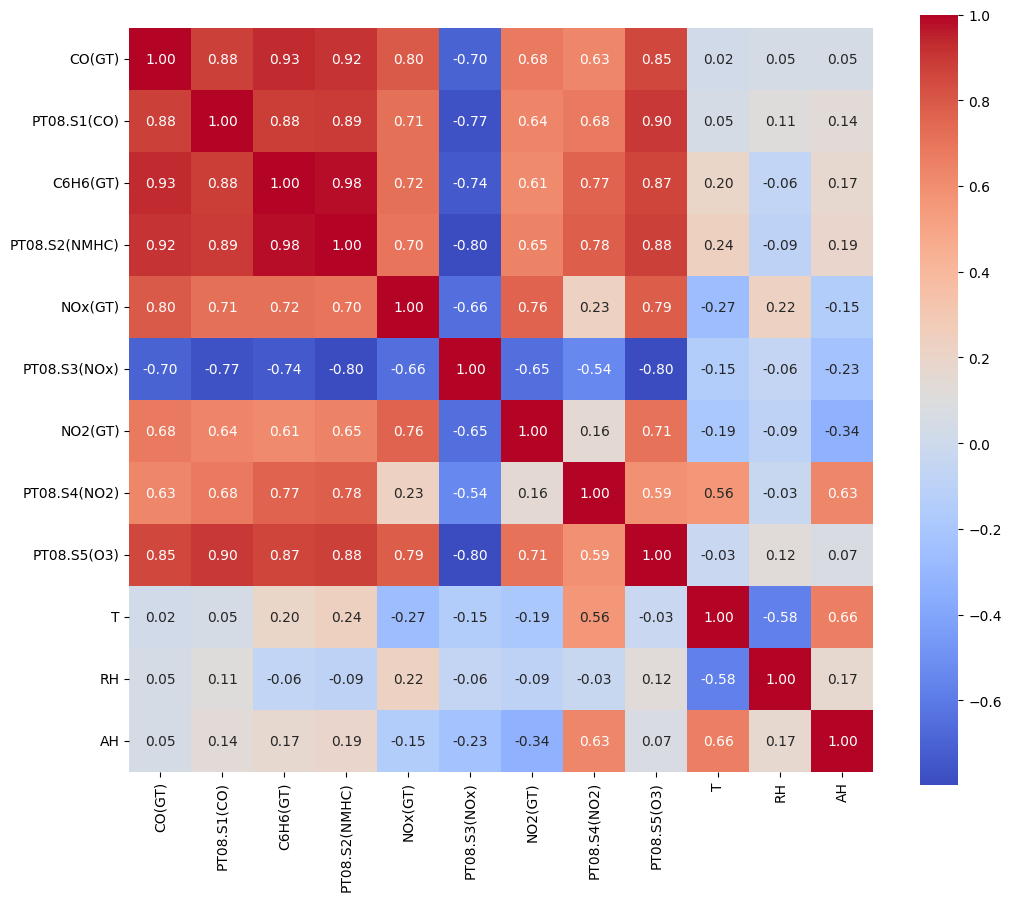

In [ ]:
# Matriz de correlación
columnas_numericas2 = airqt3.select_dtypes(include=[np.number]).columns
matriz_correlacion = airqt3[columnas_numericas2].corr()
print(matriz_correlacion)

# Mapa de calor
plt.figure(figsize=(12,10))
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.show()

* Pairplot para visualizar relaciones entre variables numéricas.

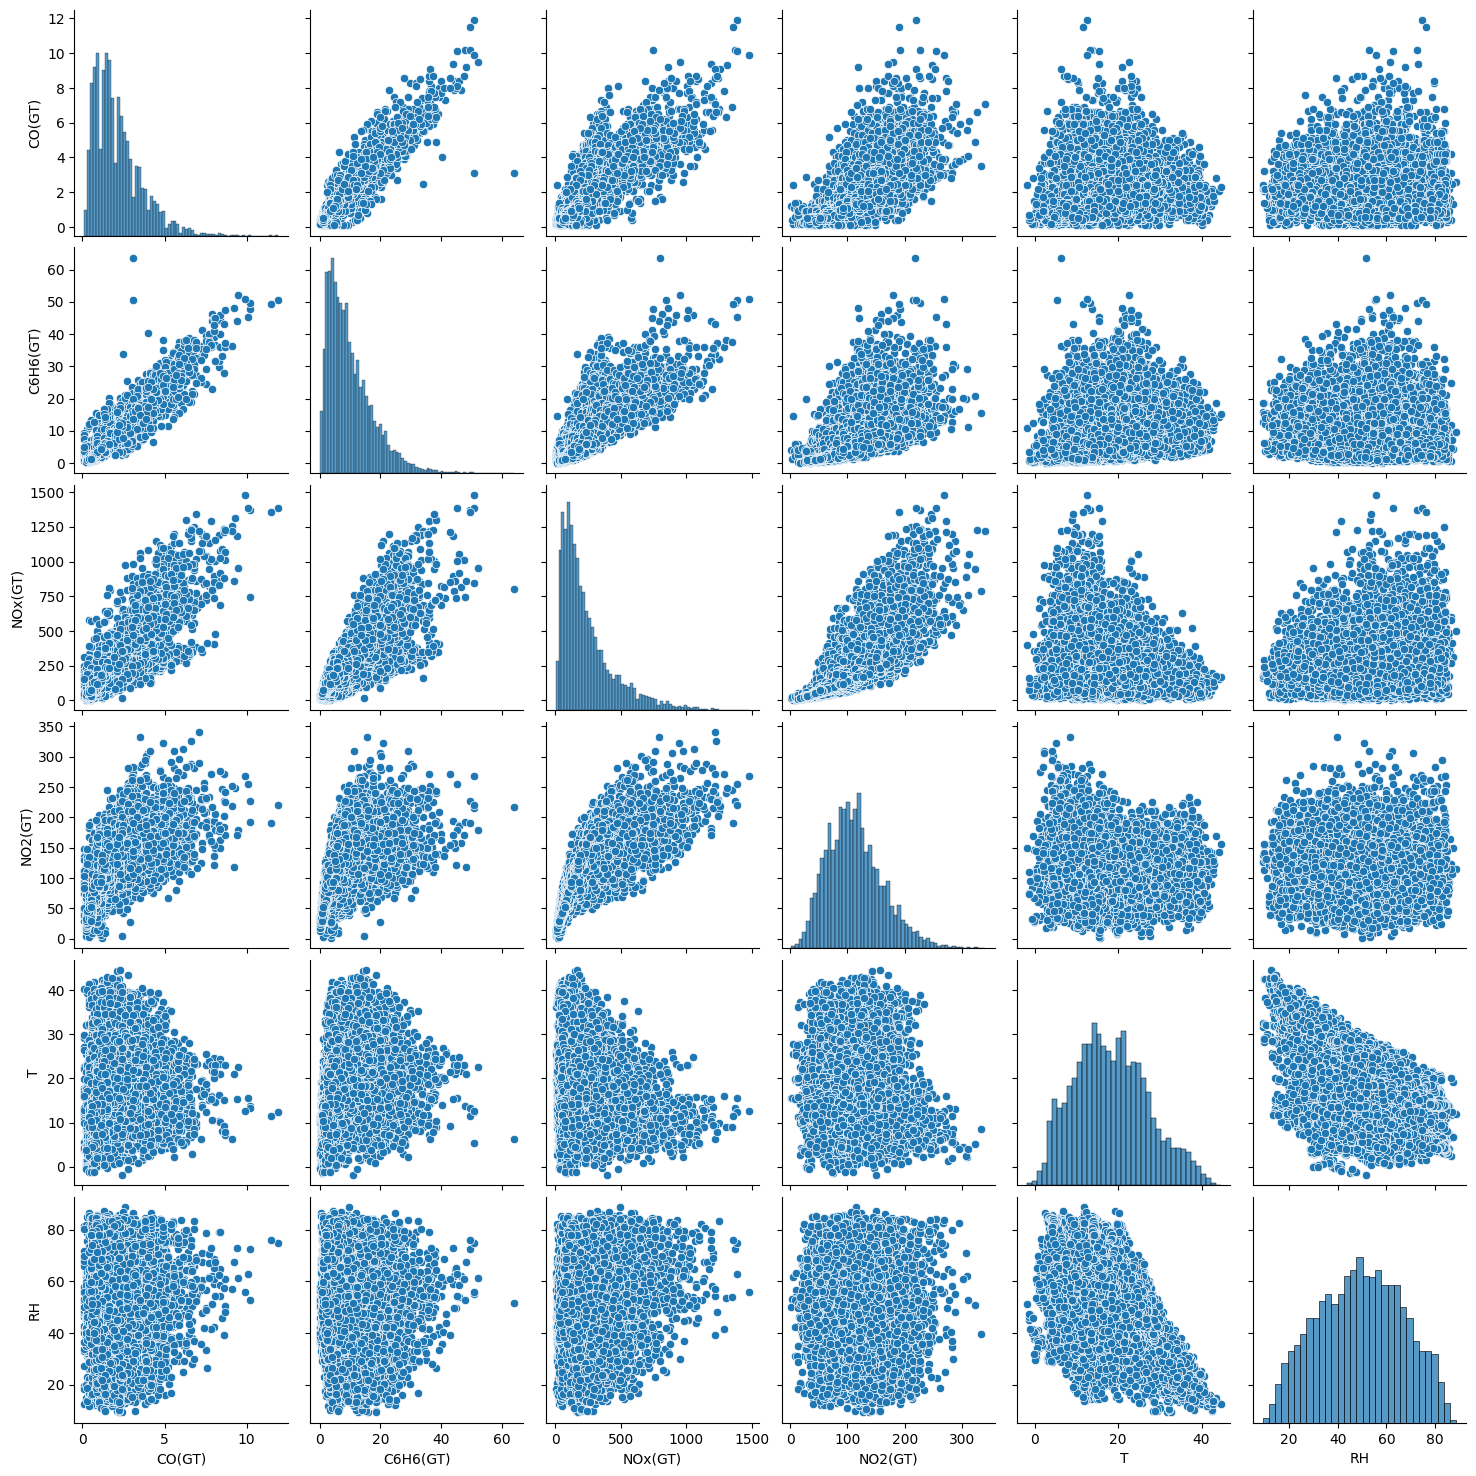

In [ ]:
# Pairplot para visualizar relaciones entre variables numéricas
columnas_seleccionadas = ['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)', 'T', 'RH']
sns.pairplot(airqt3[columnas_seleccionadas])
plt.show()



* Pruebas de normalidad (Shapiro-Wilk, Anderson-Darling, Kolmogorov-Smirnov) y QQplot para las columnas numéricas.


 Pruebas de normalidad para CO(GT) 

Shapiro-Wilk: estadístico=0.9007, p-valor=0.0000
Resultado: Se rechaza H0 → distribución no normal
--------------------------------------------------
Anderson-Darling: estadístico=178.0164
  Nivel 15.0%: Se rechaza H0 → no normal
  Nivel 10.0%: Se rechaza H0 → no normal
  Nivel 5.0%: Se rechaza H0 → no normal
  Nivel 2.5%: Se rechaza H0 → no normal
  Nivel 1.0%: Se rechaza H0 → no normal


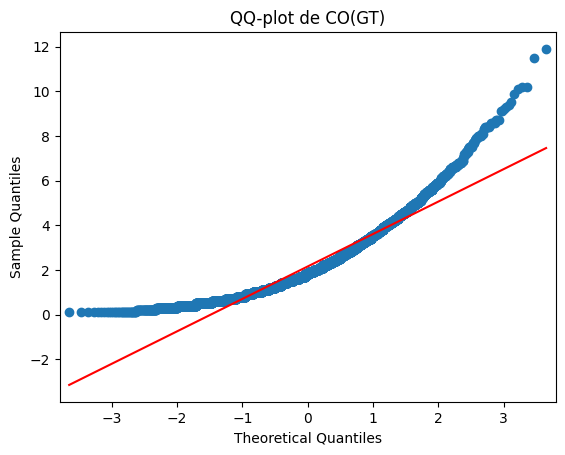


 Pruebas de normalidad para PT08.S1(CO) 

Shapiro-Wilk: estadístico=0.9607, p-valor=0.0000
Resultado: Se rechaza H0 → distribución no normal
--------------------------------------------------
Anderson-Darling: estadístico=94.7797
  Nivel 15.0%: Se rechaza H0 → no normal
  Nivel 10.0%: Se rechaza H0 → no normal
  Nivel 5.0%: Se rechaza H0 → no normal
  Nivel 2.5%: Se rechaza H0 → no normal
  Nivel 1.0%: Se rechaza H0 → no normal


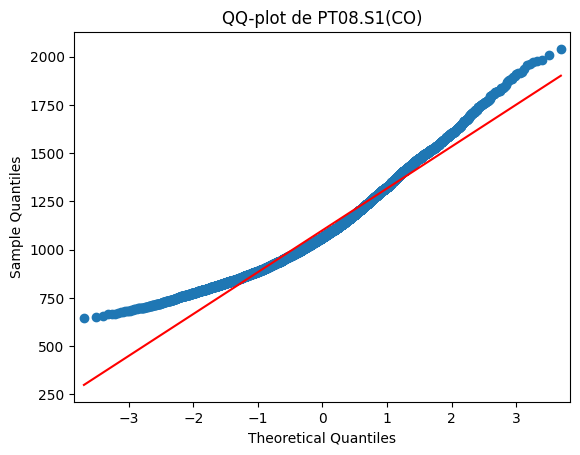


 Pruebas de normalidad para C6H6(GT) 

Shapiro-Wilk: estadístico=0.8954, p-valor=0.0000
Resultado: Se rechaza H0 → distribución no normal
--------------------------------------------------
Anderson-Darling: estadístico=229.4164
  Nivel 15.0%: Se rechaza H0 → no normal
  Nivel 10.0%: Se rechaza H0 → no normal
  Nivel 5.0%: Se rechaza H0 → no normal
  Nivel 2.5%: Se rechaza H0 → no normal
  Nivel 1.0%: Se rechaza H0 → no normal


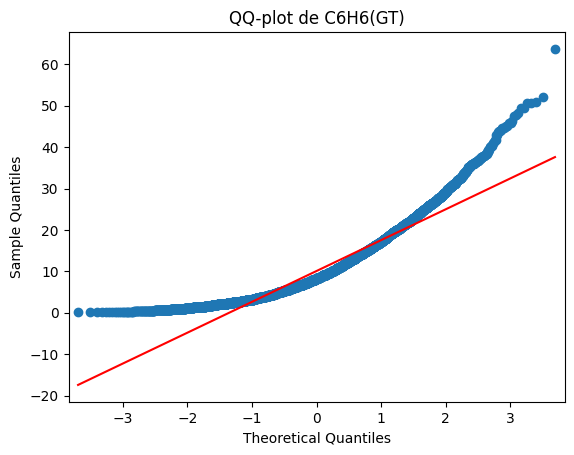


 Pruebas de normalidad para PT08.S2(NMHC) 

Shapiro-Wilk: estadístico=0.9769, p-valor=0.0000
Resultado: Se rechaza H0 → distribución no normal
--------------------------------------------------
Anderson-Darling: estadístico=47.7353
  Nivel 15.0%: Se rechaza H0 → no normal
  Nivel 10.0%: Se rechaza H0 → no normal
  Nivel 5.0%: Se rechaza H0 → no normal
  Nivel 2.5%: Se rechaza H0 → no normal
  Nivel 1.0%: Se rechaza H0 → no normal


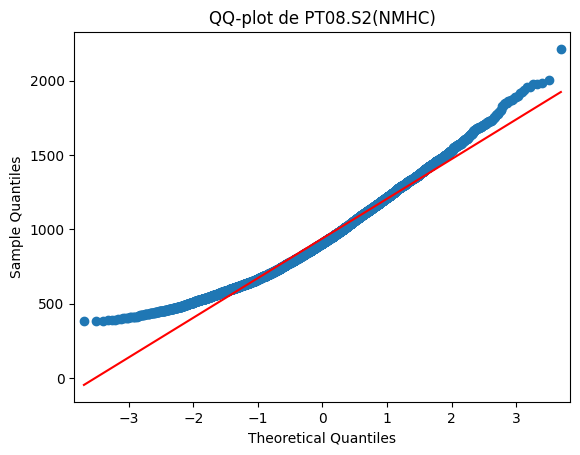


 Pruebas de normalidad para NOx(GT) 

Shapiro-Wilk: estadístico=0.8347, p-valor=0.0000
Resultado: Se rechaza H0 → distribución no normal
--------------------------------------------------
Anderson-Darling: estadístico=359.3245
  Nivel 15.0%: Se rechaza H0 → no normal
  Nivel 10.0%: Se rechaza H0 → no normal
  Nivel 5.0%: Se rechaza H0 → no normal
  Nivel 2.5%: Se rechaza H0 → no normal
  Nivel 1.0%: Se rechaza H0 → no normal


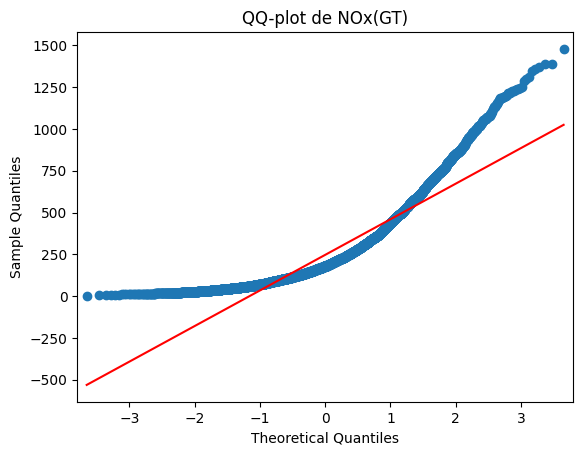


 Pruebas de normalidad para PT08.S3(NOx) 

Shapiro-Wilk: estadístico=0.9460, p-valor=0.0000
Resultado: Se rechaza H0 → distribución no normal
--------------------------------------------------
Anderson-Darling: estadístico=75.9336
  Nivel 15.0%: Se rechaza H0 → no normal
  Nivel 10.0%: Se rechaza H0 → no normal
  Nivel 5.0%: Se rechaza H0 → no normal
  Nivel 2.5%: Se rechaza H0 → no normal
  Nivel 1.0%: Se rechaza H0 → no normal


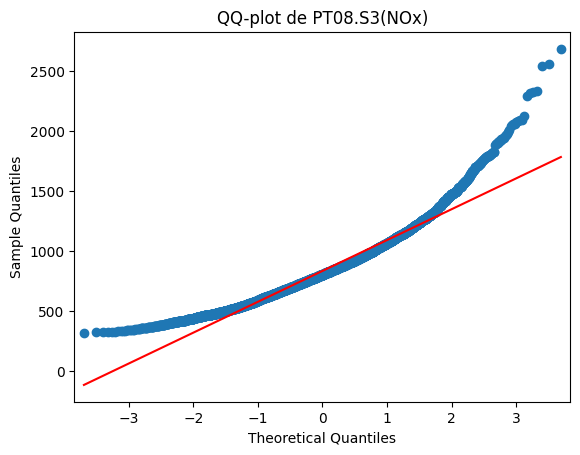


 Pruebas de normalidad para NO2(GT) 

Shapiro-Wilk: estadístico=0.9774, p-valor=0.0000
Resultado: Se rechaza H0 → distribución no normal
--------------------------------------------------
Anderson-Darling: estadístico=34.6874
  Nivel 15.0%: Se rechaza H0 → no normal
  Nivel 10.0%: Se rechaza H0 → no normal
  Nivel 5.0%: Se rechaza H0 → no normal
  Nivel 2.5%: Se rechaza H0 → no normal
  Nivel 1.0%: Se rechaza H0 → no normal


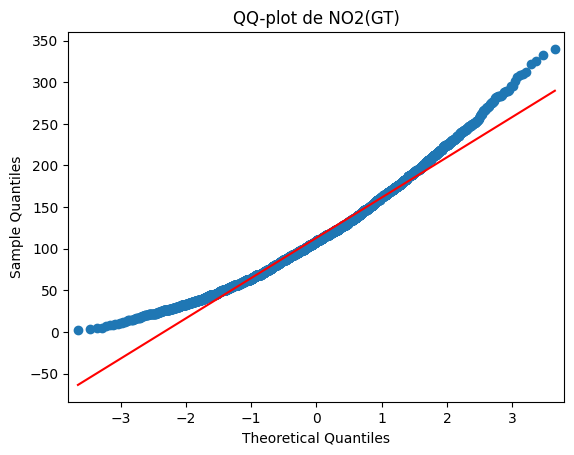


 Pruebas de normalidad para PT08.S4(NO2) 

Shapiro-Wilk: estadístico=0.9938, p-valor=0.0000
Resultado: Se rechaza H0 → distribución no normal
--------------------------------------------------
Anderson-Darling: estadístico=7.3967
  Nivel 15.0%: Se rechaza H0 → no normal
  Nivel 10.0%: Se rechaza H0 → no normal
  Nivel 5.0%: Se rechaza H0 → no normal
  Nivel 2.5%: Se rechaza H0 → no normal
  Nivel 1.0%: Se rechaza H0 → no normal


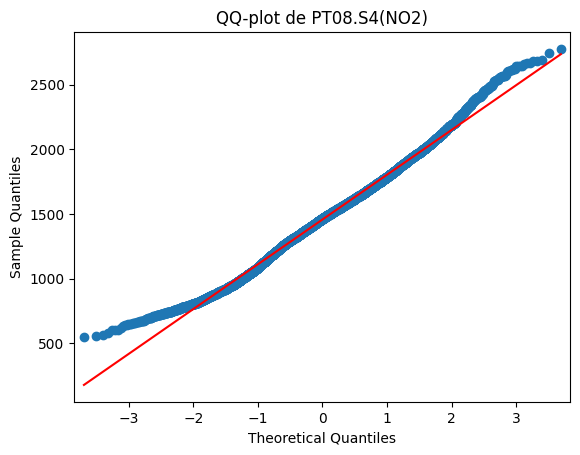


 Pruebas de normalidad para PT08.S5(O3) 

Shapiro-Wilk: estadístico=0.9711, p-valor=0.0000
Resultado: Se rechaza H0 → distribución no normal
--------------------------------------------------
Anderson-Darling: estadístico=65.8680
  Nivel 15.0%: Se rechaza H0 → no normal
  Nivel 10.0%: Se rechaza H0 → no normal
  Nivel 5.0%: Se rechaza H0 → no normal
  Nivel 2.5%: Se rechaza H0 → no normal
  Nivel 1.0%: Se rechaza H0 → no normal


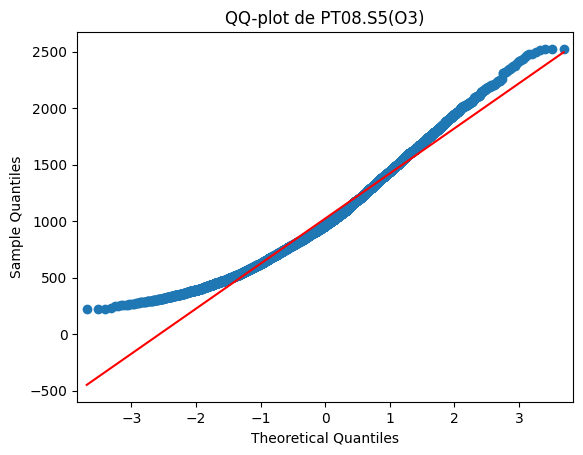


 Pruebas de normalidad para T 

Shapiro-Wilk: estadístico=0.9860, p-valor=0.0000
Resultado: Se rechaza H0 → distribución no normal
--------------------------------------------------
Anderson-Darling: estadístico=24.2621
  Nivel 15.0%: Se rechaza H0 → no normal
  Nivel 10.0%: Se rechaza H0 → no normal
  Nivel 5.0%: Se rechaza H0 → no normal
  Nivel 2.5%: Se rechaza H0 → no normal
  Nivel 1.0%: Se rechaza H0 → no normal


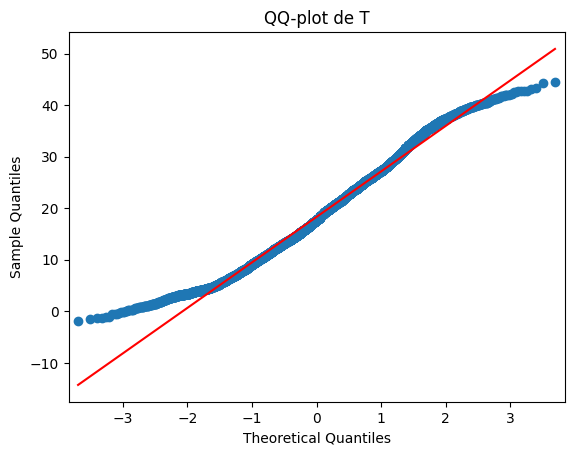


 Pruebas de normalidad para RH 

Shapiro-Wilk: estadístico=0.9849, p-valor=0.0000
Resultado: Se rechaza H0 → distribución no normal
--------------------------------------------------
Anderson-Darling: estadístico=25.4196
  Nivel 15.0%: Se rechaza H0 → no normal
  Nivel 10.0%: Se rechaza H0 → no normal
  Nivel 5.0%: Se rechaza H0 → no normal
  Nivel 2.5%: Se rechaza H0 → no normal
  Nivel 1.0%: Se rechaza H0 → no normal


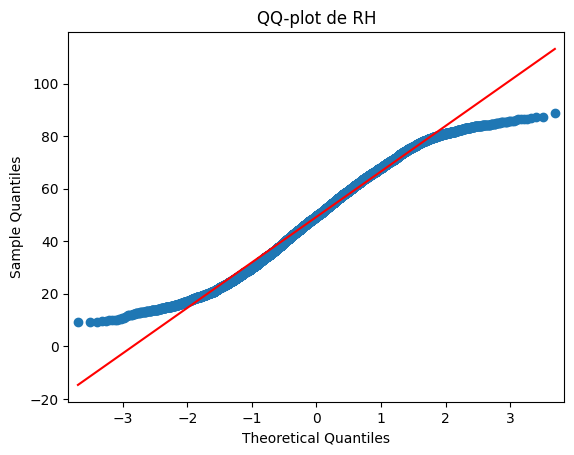


 Pruebas de normalidad para AH 

Shapiro-Wilk: estadístico=0.9855, p-valor=0.0000
Resultado: Se rechaza H0 → distribución no normal
--------------------------------------------------
Anderson-Darling: estadístico=26.8990
  Nivel 15.0%: Se rechaza H0 → no normal
  Nivel 10.0%: Se rechaza H0 → no normal
  Nivel 5.0%: Se rechaza H0 → no normal
  Nivel 2.5%: Se rechaza H0 → no normal
  Nivel 1.0%: Se rechaza H0 → no normal


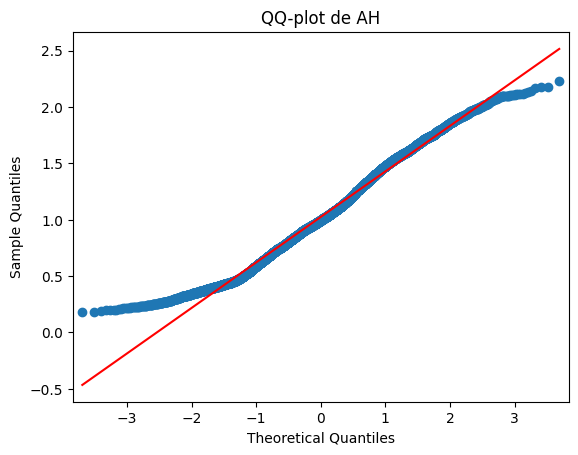

In [ ]:
from scipy.stats import shapiro, anderson
from statsmodels.graphics.gofplots import qqplot

for columna in columnas_numericas:
    print(f"\n Pruebas de normalidad para {columna} \n")

    # Eliminamos valores nulos antes de las pruebas
    datos = airqt3[columna].dropna()

    # Shapiro-Wilk
    stat, p = shapiro(datos)
    print(f"Shapiro-Wilk: estadístico={stat:.4f}, p-valor={p:.4f}")
    if p > 0.05:
        print("Resultado: No se rechaza H0 → distribución normal")
    else:
        print("Resultado: Se rechaza H0 → distribución no normal")
    print("-" * 50)

    # Anderson-Darling
    result = anderson(datos)
    print(f"Anderson-Darling: estadístico={result.statistic:.4f}")
    for sl, cv in zip(result.significance_level, result.critical_values):
        if result.statistic < cv:
            print(f"  Nivel {sl}%: No se rechaza H0 → normal")
        else:
            print(f"  Nivel {sl}%: Se rechaza H0 → no normal")

    # QQ-plot
    qqplot(datos, line='s')
    plt.title(f"QQ-plot de {columna}")
    plt.show()


#3. Identificar y tratar los datos faltantes utilizando técnicas como imputación por media, mediana o moda, o eliminación de filas/columnas según sea apropiado.

In [ ]:
# 3. Identificar y tratar los datos faltantes utilizando técnicas como imputación por media, mediana o moda, o eliminación de filas/columnas según sea apropiado.

# Elegimos método de imputació por mediana
metodo_imputacion = 'median'

# Hacemos una copia para imputar
airqt_imputed = airqt3.copy()

# Imputamos los valores nulos
for columna in columnas_numericas:
    valor = airqt_imputed[columna].median()
    airqt_imputed[columna] = airqt_imputed[columna].fillna(valor)

# Verificamos que no queden valores nulos
print("Valores nulos después de la imputación:")
print(airqt_imputed[columnas_numericas].isnull().sum())


Valores nulos después de la imputación:
CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


4. Repetir el EDA después del tratamiento de datos faltantes y comparar los resultados.


Estadísticas descriptivas después de imputación:
            CO(GT)  PT08.S1(CO)     C6H6(GT)  PT08.S2(NMHC)      NOx(GT)  \
count  9471.000000  9471.000000  9471.000000    9471.000000  9471.000000   
mean      2.085820  1097.966424     9.987668     937.625172   234.514729   
std       1.315415   211.661265     7.270307     260.065263   194.006563   
min       0.100000   647.000000     0.100000     383.000000     2.000000   
25%       1.200000   943.000000     4.600000     744.000000   113.000000   
50%       1.800000  1063.000000     8.200000     909.000000   180.000000   
75%       2.600000  1218.000000    13.500000    1102.000000   281.500000   
max      11.900000  2040.000000    63.700000    2214.000000  1479.000000   

       PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)            T  \
count   9471.000000  9471.000000   9471.000000  9471.000000  9471.000000   
mean     833.998839   112.332700   1456.605955  1019.870024    18.291585   
std      250.307741    43.684741    33

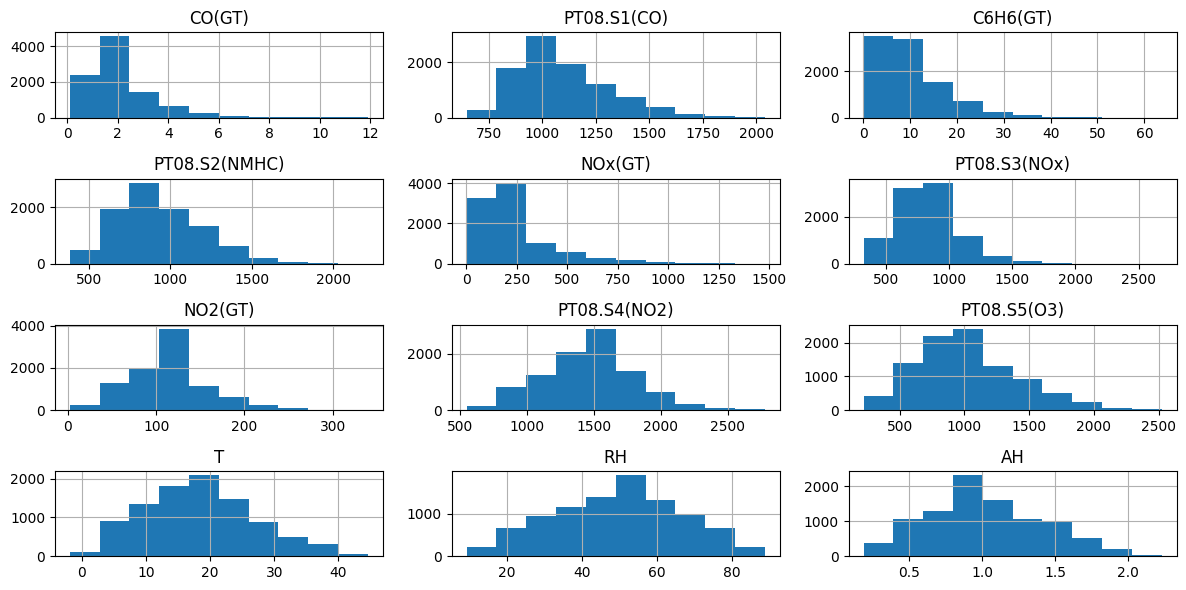

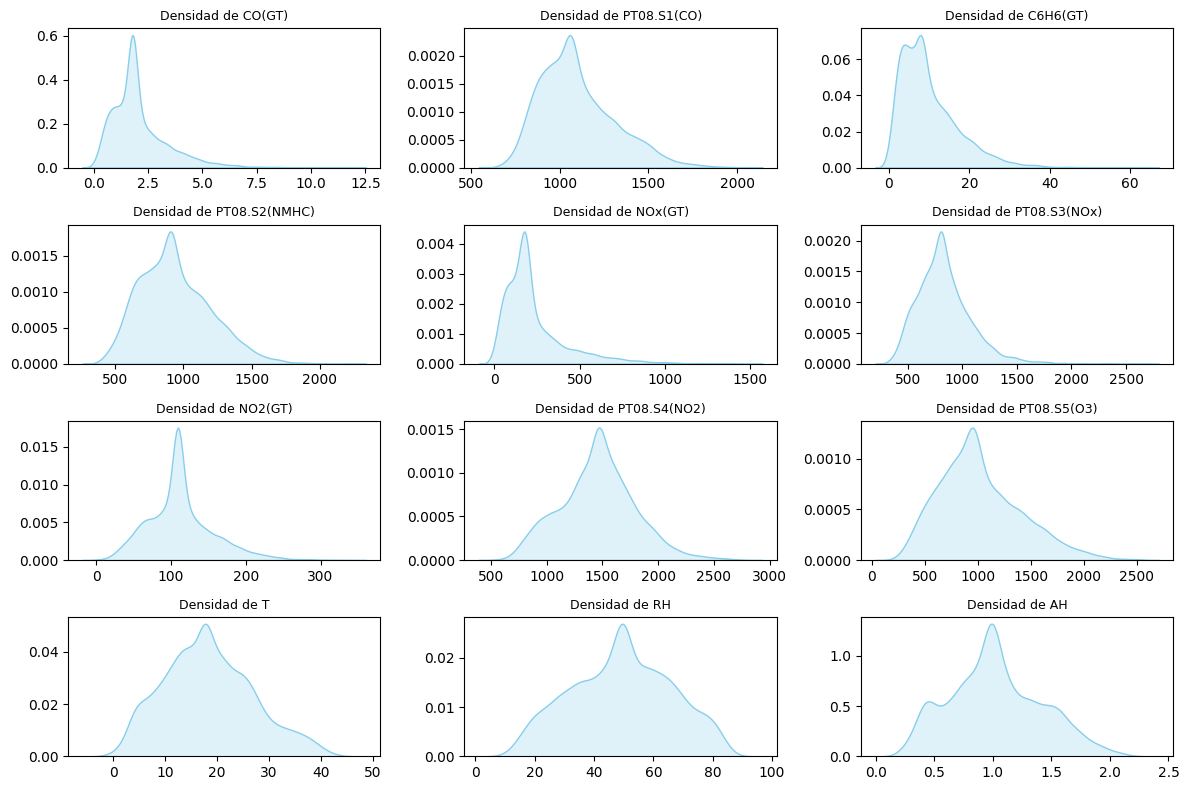

In [ ]:

# Mostramos estadísticas descriptivas después de imputación
print("Estadísticas descriptivas después de imputación:")
print(airqt_imputed[columnas_numericas].describe())

# Mostramos boxplots actualizados
fig = px.box(airqt_imputed, y=columnas_numericas)
fig.show()

# Histograma actualizado
airqt_imputed[columnas_numericas].hist(figsize=(12, 6))
plt.tight_layout()
plt.show()

# Gráficas de densidad actualizadas

plt.figure(figsize=(12, 8))

for i, columna in enumerate(columnas_numericas, 1):
    plt.subplot(4, 3, i)
    sns.kdeplot(data=airqt_imputed, x=columna, fill=True, color='skyblue')
    plt.title(f"Densidad de {columna}", fontsize=9)
    plt.xlabel("")
    plt.ylabel("")

plt.tight_layout()
plt.show()